In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Exploring Data

In [10]:
print("categories in 'gender' variable:    ",end=" ")
print(df['gender'].unique())


print("categories in 'race_ethnicity' variable:",end=" ")
print(df['race_ethnicity'].unique())


print("categories in  'parental_level_of_education' variable:",end=" ")
print(df['parental_level_of_education'].unique())


print("categories in 'lunch' variable:", end=" " )
print(df['lunch'].unique())

print("categories in  'test_preparation_course' variable:", end=" ")
print(df['test_preparation_course'].unique())

categories in 'gender' variable:     ['female' 'male']
categories in 'race_ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
categories in  'parental_level_of_education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variable: ['standard' 'free/reduced']
categories in  'test_preparation_course' variable: ['none' 'completed']


In [11]:
# define numerical & categorical columns

numeric_features = [feature for feature in df.columns if df[feature].dtype !='o']
categorical_features = [feature for feature in df.columns if df[feature].dtypes =='o']


# print columns

print('We have {} numerical features : {}'.format(len(numeric_features),numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features),categorical_features))

We have 8 numerical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'math_score', 'reading_score', 'writing_score']

We have 0 categorical features : []


In [12]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
reading_full = df[df['reading_score']== 100]['average'].count()
writing_full = df[df['writing_score']== 100]['average'].count()
math_full = df[df['math_score']== 100]['average'].count()


print(f'Number of student with full marks in maths: {math_full}')
print(f'Number of student with full marks in writing: {writing_full}')
print(f'Number of student with full marks in reading: {reading_full}')

Number of student with full marks in maths: 7
Number of student with full marks in writing: 14
Number of student with full marks in reading: 17


In [14]:
reading_less_20 = df[df['reading_score'] <=20]['average'].count()
writing_less_20 = df[df['writing_score'] <=20]['average'].count()
math_less_20 = df[df['math_score'] <=20]['average'].count()



print(f'Number of student with less than 20 marks in math:{math_less_20}')
print(f'Number of student with less than 20 marks in writing:{writing_less_20}')
print(f'Number of student with less than 20 marks in reading:{reading_less_20}')

Number of student with less than 20 marks in math:4
Number of student with less than 20 marks in writing:3
Number of student with less than 20 marks in reading:1


# Histogram & KDE

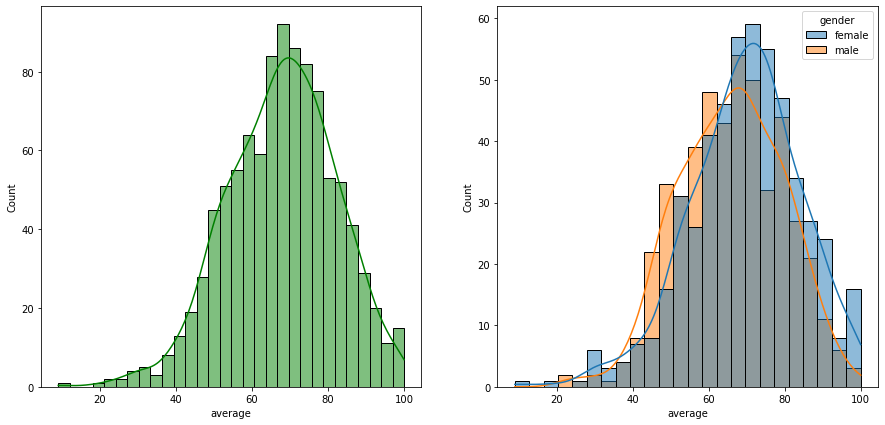

In [15]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

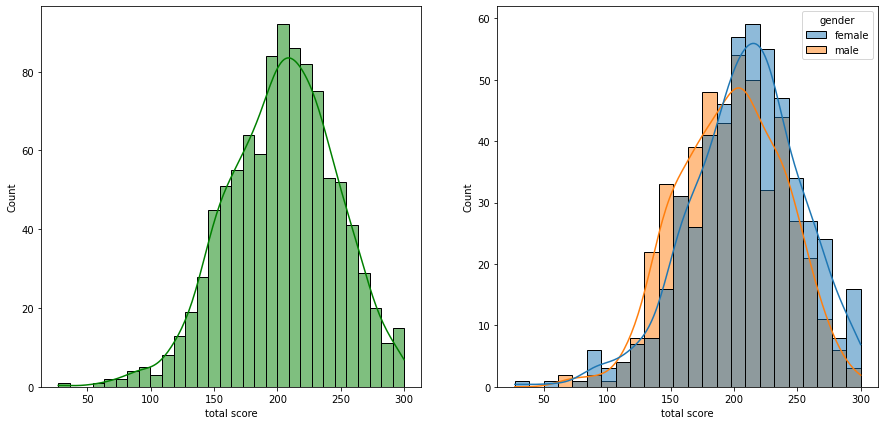

In [16]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

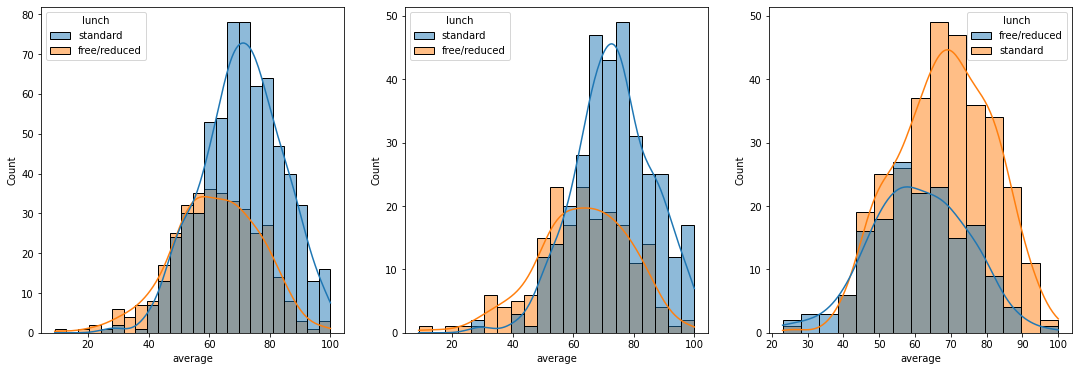

In [17]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

# Multivariate analysis using pieplot

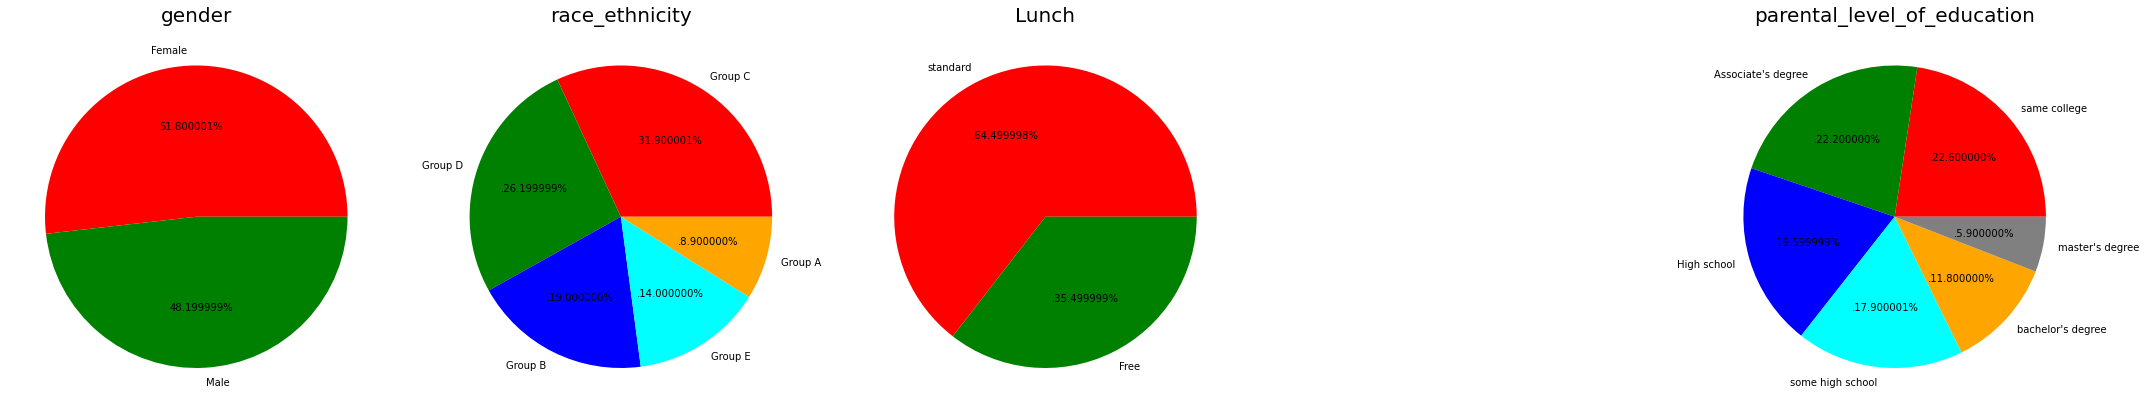

In [18]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Female','Male'
color = ['red','green']


plt.pie(size,colors = color, labels = labels,autopct = '%2f%%')
plt.title('gender',fontsize = 20)
plt.axis('off')


plt.subplot(1,5,2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C','Group D','Group B','Group E','Group A'
color = ['red','green','blue','cyan','orange']


plt.pie(size, colors= color,labels=labels,autopct = '.%2f%%')
plt.title('race_ethnicity',fontsize = 20)
plt.axis('off')



plt.subplot(1,5,3)
size = df['lunch'].value_counts()
labels = 'standard','Free'
color = ['red','green']


plt.pie(size,colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch',fontsize = 20)
plt.axis('off')



plt.subplot(1,5,5)
size = df['parental_level_of_education'].value_counts()
labels = 'same college',"Associate's degree",'High school','some high school',"bachelor's degree","master's degree"
color = ['red','green','blue','cyan','orange','grey']


plt.pie(size,colors = color,labels= labels,autopct = '.%2f%%')
plt.title('parental_level_of_education',fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()





# Univariate analysis (how is distribution of gender)

# Bivariate analysis

In [22]:
gender_group = df.groupby('gender').mean()
gender_group

,math_score,reading_score,writing_score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


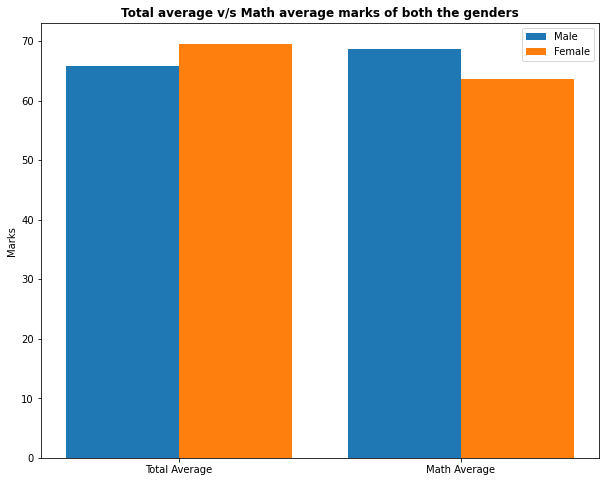

In [24]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()